## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [34]:
import pandas as pd 

df = pd.read_csv('/Users/kimsunhwa/Desktop/Visual_Studio/사교육비조사.csv') #csv 파일 읽기

print(df[0:10]) # 10개의 데이터 출력


   지역구분코드  행정구역시도코드  학교급구분코드  방과후학교참여여부  방과후학교참여시간수  EBS교재비   사교육참여시간수  \
0       1        11        1          1    0.333333     0.0   6.333333   
1       1        11        1          1    0.666667     0.0   0.000000   
2       1        11        1          1    0.666667     0.0   0.000000   
3       1        11        1          1    0.666667     0.0   0.000000   
4       1        11        1          1    0.666667     0.0   1.000000   
5       1        11        1          1    0.666667     0.0   1.000000   
6       1        11        1          1    0.666667     0.0   1.000000   
7       1        11        1          1    0.666667     0.0   1.000000   
8       1        11        1          1    0.666667     0.0   1.333333   
9       1        11        1          1    0.666667     0.0  10.333333   

   일반교과사교육시간수  예체능사교육시간수     사교육비총비용  총자녀수  학생성적구분코드  부_교육정도코드  모_교육정도코드  \
0    4.333333   2.000000  392.236071     2       NaN      51.0      31.0   
1    0.000000   0.000000    0.000

1.2 불러온 데이터의 요약 정보를 출력하세요.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [36]:
df.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [37]:
df = df.loc[(df['학교급구분코드'] == 3)] # 학교급구분코드가 3인 데이터만 df에 저장

len(df) 

30052

In [38]:
df = df.drop('학교급구분코드', axis=1) # '학교급구분코드'의 열(axis=1)을 삭제 / 행은 (axis=0)

df

,지역구분코드,행정구역시도코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,4,39,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,4,39,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,4,39,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [39]:
df = df.drop(['지역구분코드', '행정구역시도코드'], axis=1) #지역구분코드, 행정구역시도코드의 열을 삭제

df

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [40]:
df['방과후학교참여여부'].value_counts() # 방과후학교참여여부에 속한 값들의 개수를 확인 / 1이 18498, 2가 11554개 있음

방과후학교참여여부
1    18498
2    11554
Name: count, dtype: int64

In [41]:
df.loc[df['방과후학교참여여부'] == 1, '방과후학교참여여부'] = '참여' # 방과후학교참여여부가 1이면, 방과후학교참여여부 행을 '참여'로 변경
df.loc[df['방과후학교참여여부'] == 2, '방과후학교참여여부'] = '미참여' # 방과후학교참여여부가 2이면, 방과후학교참여여부 행을 '미참여'로 변경

df

/var/folders/zz/f_yhbfns1c74jbf2npw1lrxm0000gn/T/ipykernel_28429/358737977.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '참여' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['방과후학교참여여부'] == 1, '방과후학교참여여부'] = '참여' # 방과후학교참여여부가 1이면, 방과후학교참여여부 행을 '참여'로 변경


,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,참여,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,참여,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,참여,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,참여,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,참여,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,미참여,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,미참여,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,미참여,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,미참여,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


In [42]:
df_dummy = pd.get_dummies(df['방과후학교참여여부'])
df_dummy

,미참여,참여
4920,False,True
4921,False,True
4922,False,True
4923,False,True
4924,False,True
...,...,...
75678,True,False
75679,True,False
75680,True,False
75681,True,False


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [43]:
df = df.drop(['EBS교재비'], axis=1) 
df

,방과후학교참여여부,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,참여,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,참여,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,참여,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,참여,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,참여,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,미참여,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,미참여,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,미참여,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,미참여,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

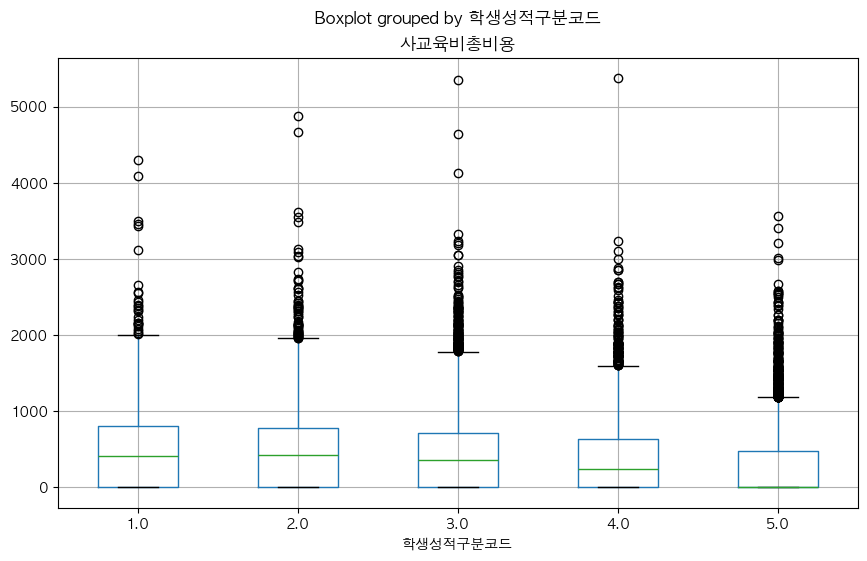

In [44]:
import matplotlib.pyplot as plt 

scores = df['학생성적구분코드']
costs = df['사교육비총비용']


data = pd.DataFrame({'학생성적구분코드':scores, '사교육비총비용':costs})


boxplot = data.boxplot(column = ['사교육비총비용'], by = '학생성적구분코드', figsize = (10,6))

plt.show()

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [24]:
scores = df['학생성적구분코드']

scores_group = scores.replace({1 : '상위', 2 : '상위', 4 : '하위', 5 : '하위'}) # 1, 2를 상위로, 4, 5를 하위로 대체

In [56]:
df_dummy = pd.get_dummies(scores_group) #score_group을 더미로 변환
df_dummy

,3.0,상위,하위
4920,False,True,False
4921,True,False,False
4922,False,False,True
4923,False,False,True
4924,False,False,True
...,...,...,...
75678,False,False,True
75679,False,False,True
75680,False,False,True
75681,False,True,False


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A:

    Label Encoding은 알파벳순으로 숫자를 할당해주는 것으로 알파벳순으로 정렬이 가능하고, 정렬된 기준으로 번호를 매긴다.
    이에 순서나 랭크가 없는 데이터도 랭킹이 매겨져 모델에 잘못 반영될 수도 있다.

    One Hot Encoding은 더미변수를 만들어 처리하는 방법이다.
    모든 경우의 수 중 해당하는 부분에 1이 생기고, 해당하지 않는 곳에 0이 생긴다.
    
    https://azanewta.tistory.com/46 (참고)


2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [58]:
scores = df['학생성적구분코드']

scores_group = scores.replace({1 : '상위', 2 : '상위', 4 : '하위', 5 : '하위'}) 

df_dummy = pd.get_dummies(scores_group, drop_first = True) #score_group을 더미 중 3.0을 drop해서 다중공선성 문제 해결

df_dummy

,상위,하위
4920,True,False
4921,False,False
4922,False,True
4923,False,True
4924,False,True
...,...,...
75678,False,True
75679,False,True
75680,False,True
75681,True,False


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A:

    One Hot Encoding 방법은 더미변수(가변수) 처리 방법으로 범주형 변수를 0, 1의 값으로 변수를 변환해주는 것을 말한다.
    만약 가변수를 범주의 개수만큼 만들었다고 가정했을 때 다른 가변수가 모두 0이면 나머지 한 개의 가변수는 무조건 1이 된다.
    이는 가변수의 값이 다른 가변수에 영향을 주기에 각각의 가변수는 독립성을 가지고 있지 않고, 강한 상관성이 존재하여 다중공선성 문제가 발생한다.

    즉, 다중공선성 문제는 각각의 변수가 독립성을 가지고 있지 않고, 강한 상관성이 존재하는 것을 말한다. 

    https://blog.naver.com/angryking/222466087242 (참고)

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

In [72]:
import seaborn as sns 

df = df[['사교육참여시간수','일반교과사교육시간수','예체능사교육시간수']] # 세가지 데이터를 df에 담기

df_corr = df.corr() # df 변수들의 상관 관계 파악하기
df_corr


,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수
사교육참여시간수,1.000000,0.788419,0.514551
일반교과사교육시간수,0.788419,1.000000,-0.103757
예체능사교육시간수,0.514551,-0.103757,1.000000


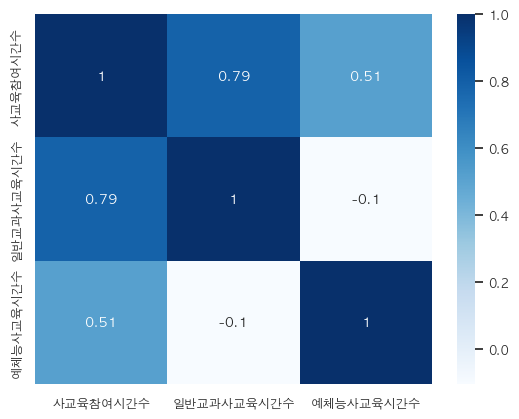

In [81]:
sns.set(font_scale = 0.8) # 크기 조절
plt.rcParams['font.family'] = 'AppleGothic' # 글씨 깨짐 방지
ax = sns.heatmap(df_corr, cmap = 'Blues', annot = True) # 파란색으로 히트맵 제작, 글씨 사용

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [99]:
df = pd.read_csv('/Users/kimsunhwa/Desktop/Visual_Studio/사교육비조사.csv')
df = df.loc[(df['학교급구분코드'] == 3)]
df = df.drop(['지역구분코드', '행정구역시도코드','학교급구분코드', 'EBS교재비'], axis=1) 

print(df.isnull().sum()) # null의 합계 / 진학희망고등학교유형코드 다 null이므로 삭제

df = df.drop('진학희망고등학교유형코드', axis=1) 

df['부_교육정도코드'] = df['부_교육정도코드'].fillna(df['부_교육정도코드'].mean()) #결측치를 평균으로 처리
df['모_교육정도코드'] = df['모_교육정도코드'].fillna(df['모_교육정도코드'].mean())
df['부모경제활동코드'] = df['부모경제활동코드'].fillna(df['부모경제활동코드'].mean())

df

방과후학교참여여부           0
방과후학교참여시간수          0
사교육참여시간수            0
일반교과사교육시간수          0
예체능사교육시간수           0
사교육비총비용             0
총자녀수                0
학생성적구분코드            0
부_교육정도코드         1569
모_교육정도코드          978
부모경제활동코드          105
월평균가구소득코드           0
진학희망고등학교유형코드    30052
dtype: int64


,방과후학교참여여부,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드
4920,1,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.000000,61.0,2.0,4
4921,1,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.000000,51.0,3.0,6
4922,1,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.000000,41.0,3.0,4
4923,1,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.000000,51.0,3.0,1
4924,1,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.000000,62.0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
75678,2,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.000000,31.0,3.0,4
75679,2,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.000000,31.0,3.0,6
75680,2,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.000000,51.0,3.0,8
75681,2,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.000000,63.0,3.0,5


In [98]:
df.loc[df['방과후학교참여여부'] == 1, '방과후학교참여여부'] = '참여' 
df.loc[df['방과후학교참여여부'] == 2, '방과후학교참여여부'] = '미참여'

df

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드
4920,참여,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.000000,61.0,2.0,4
4921,참여,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.000000,51.0,3.0,6
4922,참여,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.000000,41.0,3.0,4
4923,참여,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.000000,51.0,3.0,1
4924,참여,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.000000,62.0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,미참여,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.000000,31.0,3.0,4
75679,미참여,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.000000,31.0,3.0,6
75680,미참여,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.000000,51.0,3.0,8
75681,미참여,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.000000,63.0,3.0,5


### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)